In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
src = cv2.imread('../1/people.png')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

In [3]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())# 사람에 대한 데이터로 SVM Classfier 세팅 (Defalut는 64X128, Daimler는 48X96으로 트레이닝)

In [4]:
loc1, weight1 = hog.detect(src)#loc 위치, weight 확률 여기선 사람일 확률 -> confidence 라고 함.
#loc1, weight1 = hog.detect(gray)# <- gray로 만들고 싶다면
print(len(loc1))

0


# 위에서는 Training 한 사람 크기와 실제 사진의 사람 크기 사이즈가 달라서 안 찾아짐.

In [5]:
dst2 = src.copy()
loc2, weight2 = hog.detectMultiScale(src)# 사이즈 다양하게
print(len(loc2))

3


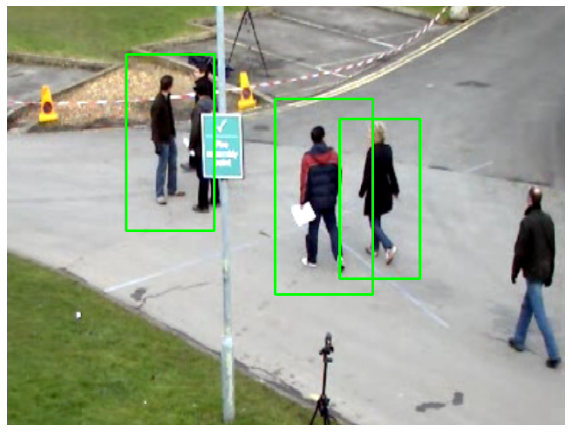

In [6]:
# 화면에 출력
for rect in loc2:
    x, y, w, h = rect
    cv2.rectangle(dst2, (x, y), (x+w, y+h), (0, 255, 0), 2)

dst2_rgb = cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 20))
plt.axis('off')
plt.imshow(dst2_rgb)
plt.show()

6


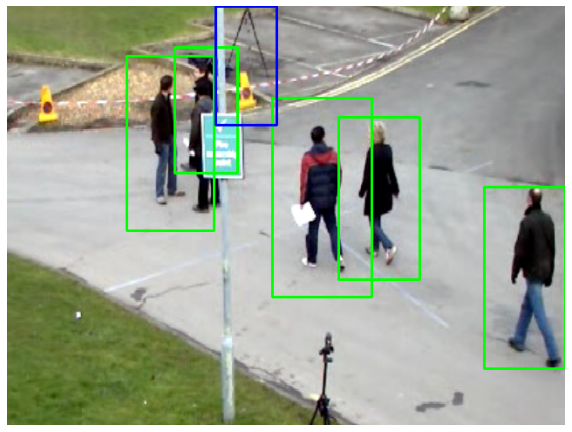

In [7]:
dst3 = src.copy()
loc3, weight3 = hog.detectMultiScale(src, winStride=(1, 1), padding=(8, 8))# (딥러닝의 CNN에서 나오는 내용) winStride->촘촘하게(겹친 사람 찾기 위해), padding->덧붙임(끝쪽 사람 찾기 위해)
print(len(loc3))

for i, rect in enumerate(loc3):
    x, y, w, h = rect
    if weight3[i] > .5:
        cv2.rectangle(dst3, (x, y), (x+w, y+h), (0, 255, 0), 2)
    else:
        cv2.rectangle(dst3, (x, y), (x+w, y+h), (255, 0, 0), 2)

dst3_rgb = cv2.cvtColor(dst3, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 20))
plt.axis('off')
plt.imshow(dst3_rgb)
plt.show()